# Prerequisite
* Load required packages and load images (already uploaded on  blackboard content) in Colab
* Create your own copy of notebook and add required code snippets in between the questions subsections. Also display the figures at each stage.
*Colab can be exported as a notebook file or Python file by **File > Download .ipynb** or **File > Download .py**. Exported notebook files can be reloaded into Google Colab or used in Jupyter Notebook.
* Please go through [Colab document](https://colab.research.google.com/drive/1YKHHLSlG-B9Ez2-zf-YFxXTVgfC_Aqtt) for further information.

* **Use ONLY tensorflow/pytorch operations and basic numpy operations are allowed**
*Special Exception for this Lab-03. You can use cv2.LUT()


In [35]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

Image Size is (667, 1000)


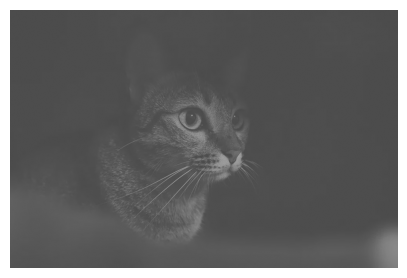

In [76]:
img = cv.imread('/content/cat-in-low-dark-gray.jpg',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img.shape))
plt.figure(figsize=(5,5))
plt.imshow(img, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

Image Size is (667, 1000)


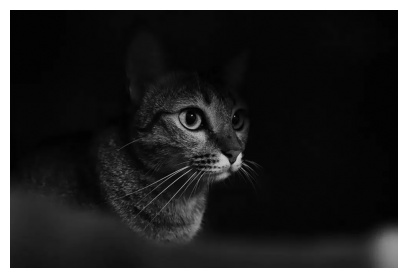

In [77]:
img_GT = cv.imread('/content/cat-in-dark-gray.jpg',cv.IMREAD_GRAYSCALE)
print('Image Size is {}'.format(img_GT.shape))
plt.figure(figsize=(5,5))
plt.imshow(img_GT, cmap='gray',vmin=0, vmax=255)
plt.axis('off')
plt.show()

In [78]:
img.dtype

dtype('uint8')

#Q1) a)Implement following function in Image "Linear_Contrast_stretching_plot.png" for Contrast Enhancement. Name this function as $lin\_stretch(img, params)$ [3 Marks]
Here $params = [r1,s1,r2,s2]$. Kindly tune the params to get better result.

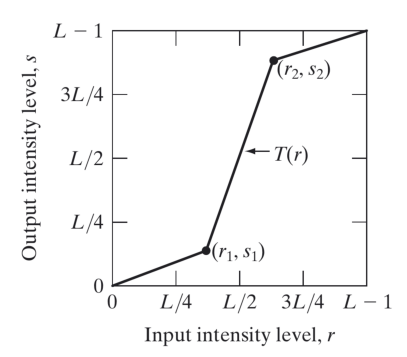

In [79]:
stretch_plot = cv.imread('/content/Linear_Contrast_stretching_plot.png')
plt.figure(figsize=(5,5))
plt.imshow(stretch_plot)
plt.axis('off')
plt.show()


In [99]:
def lin_stretch(img, params):
    if img is None:
        print("Error: Input image is None.")
        return None

    r1, s1, r2, s2 = params
    L = 256


    output_img = np.copy(img).astype(np.float32)


    output_img[img < r1] = s1
    output_img[(img >= r1) & (img <= r2)] = s1 + ((s2 - s1) / (r2 - r1)) * (img[(img >= r1) & (img <= r2)] - r1)
    output_img[img > r2] = s2

    output_img = np.clip(output_img, 0, 255).astype(np.uint8)

    return output_img





#Q1) b) Apply $lin\_stretch$ function on $img$ and calculate its root mean squared error (RMSE) with $img\_GT$ [2 Marks]

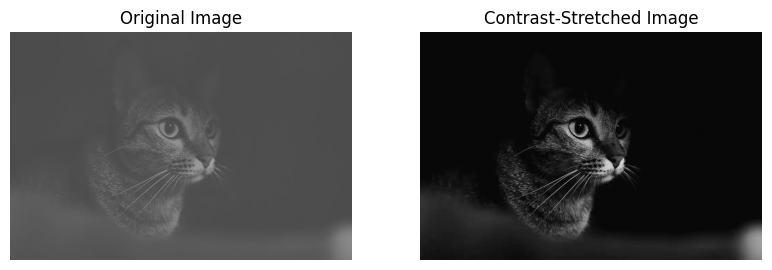

RMSE between the original and contrast-stretched images: 3.475214445509638


In [122]:
params = [80,8,155,210]
stretched_img = lin_stretch(img, params)

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


plt.subplot(1, 3, 2)
plt.title("Contrast-Stretched Image")
plt.imshow(stretched_img, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()


mse = np.mean((stretched_img-img_GT) ** 2)
rmse = np.sqrt(mse)

print(f"RMSE between the original and contrast-stretched images: {rmse}")

Size of image is (828, 1621)
Minimum and Maximum intensity value in image is (21,255)


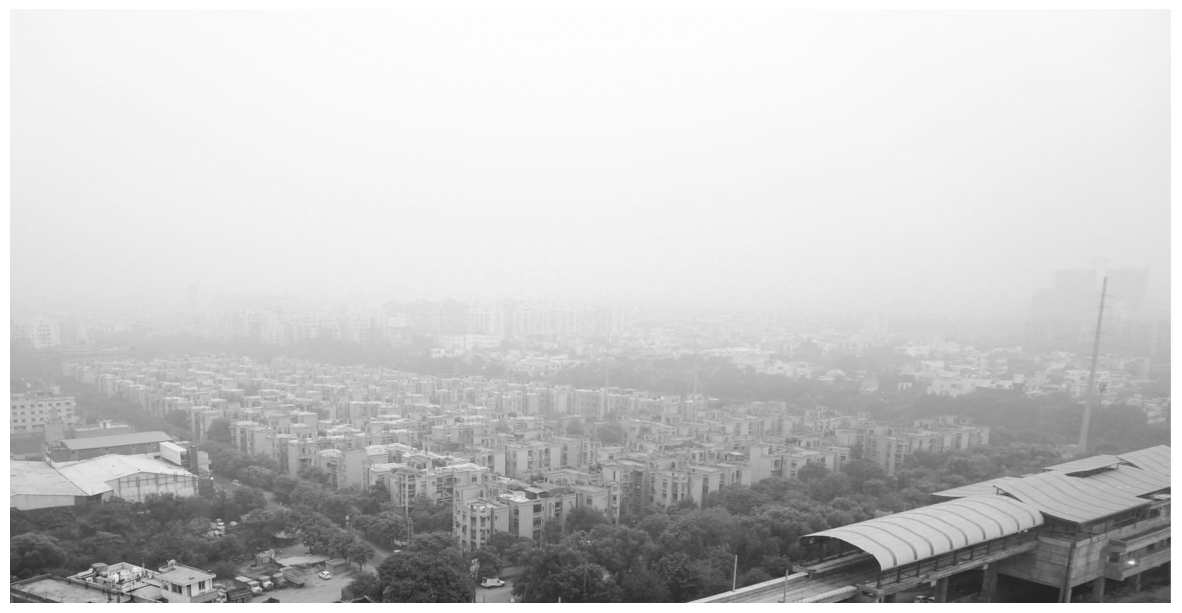

In [95]:
img2 = cv.imread('/content/foggy_noida01_gray.jpg', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img2.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img2) ,np.max(img2)))
plt.figure(figsize=(15,15))
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

Size of image is (828, 1621)
Minimum and Maximum intensity value in image is (0,255)


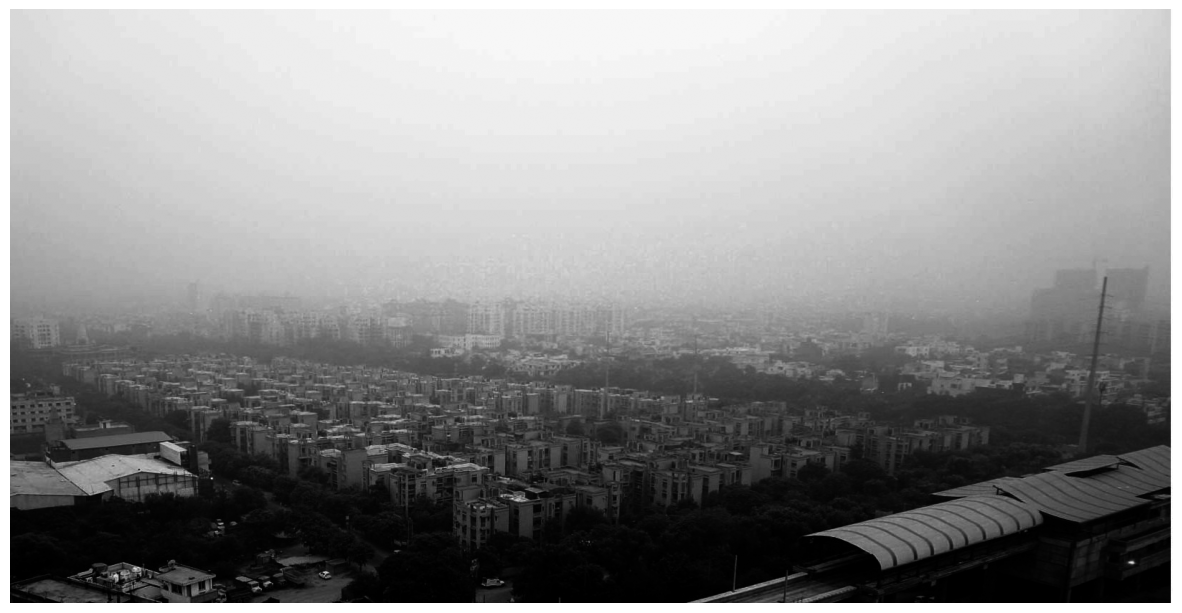

In [94]:
img2_GT = cv.imread('/content/foggy_noida01_gray_GT.jpg', cv.IMREAD_GRAYSCALE)
print('Size of image is {}'.format(img2_GT.shape))
print('Minimum and Maximum intensity value in image is ({},{})'.format(np.min(img2_GT) ,np.max(img2_GT)))
plt.figure(figsize=(15,15))
plt.imshow(img2_GT, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()

#Q2) a) Implement Power-law (Gamma) Transformations $s = c.(\frac{r}{d})^{\gamma}$ as function $gamma\_corr(img2, gamma)$ [4 Marks]
Tune $gamma \in [1,5]$ to get better result.

In [92]:


def gamma_corr(img2, gamma):

    img2_normalized = img2 / 255.0


    c = 1
    d = np.max(img2_normalized)
    corrected_img = c * np.power(img2_normalized / d, gamma)


    corrected_img = (corrected_img * 255).astype(np.uint8)

    return corrected_img

#Q2) b) Apply $gamma\_corr$ function on $img2$ and calculate its root mean squared error (RMSE) with $img2\_GT$ [1 Marks]

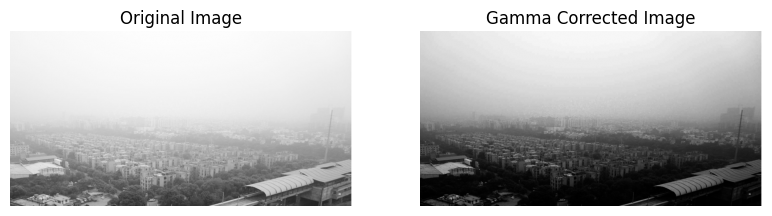

RMSE between the original and gamma corrected images: 0.7951061882779643


In [97]:

gamma = 3.7
corrected_img2 = gamma_corr(img2, gamma)


plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.title("Original Image")
plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')


plt.subplot(1, 3, 2)
plt.title("Gamma Corrected Image")
plt.imshow(corrected_img2, cmap='gray', vmin=0, vmax=255)
plt.axis('off')

plt.show()

mse = np.mean((corrected_img2 - img2_GT)**2)
rmse = np.sqrt(mse)
print(f"RMSE between the original and gamma corrected images: {rmse}")